# Ordem de um sistema

Sistemas podem ser convenientemente classificados pela ordem da equação diferencial que os modela,
\begin{equation}
a_n\frac{d^ny(t)}{dt^n}+a_{n-1}\frac{d^{n-1}y(t)}{dt^{n-1}}+...+a_0 y(t)=u(t)
\end{equation}
onde $y(t)$ é a saída, $u(t)$ é o estímulo, $t$ o tempo, $n$ é a ordem e $a_i$ são características do sistema. As características dinâmicas são mostradas através da resposta dos sistemas a quatro tipos de perturbações diferentes, 
* Função degrau;
* Função impulso;
* Função rampa;
* Função senoidal.

Como todo sistema dinâmico, sua resposta pode ser dividida em resposta natural ou homogênea e resposta forçada, de estado estacionário ou solução particular.

<div>
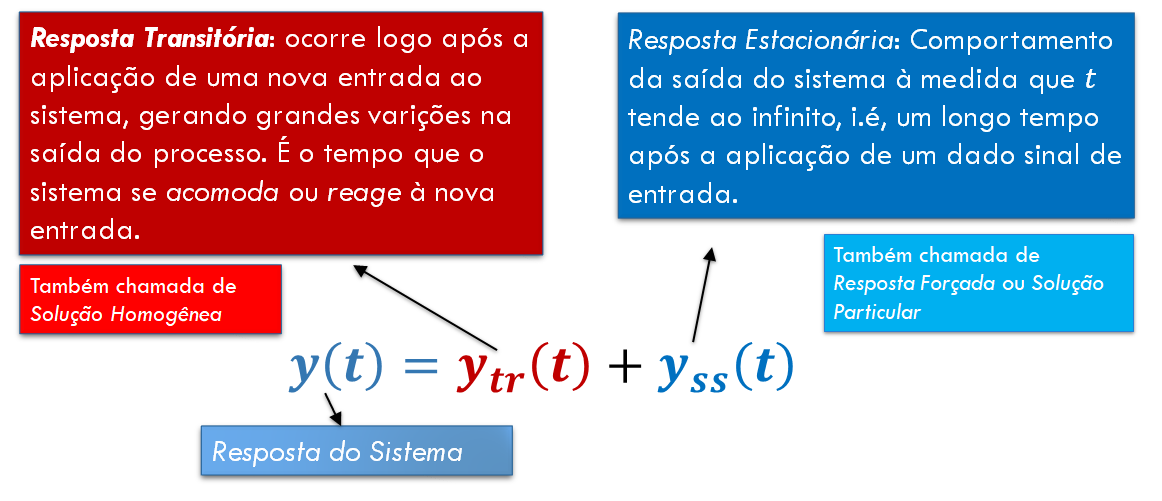
</div>

## Sistemas de Primeira ordem

Em sistemas de primeira orde,
\begin{equation}
a_1\frac{dy(t)}{dt}+a_0 y(t)=u(t)
\end{equation}
ou
\begin{equation}
c\dot{y}(t)+k y(t)=u(t)
\end{equation}
onde $c$ é o amortecimento e $k$ a rigidez do sistema.

Aplica-se a Transformada de Laplace em ambos os lados da equação:
\begin{equation}
c sY(s)+ k Y(s)= U(s)
\end{equation}

Pode-se, então, explicitar a função de transferência do sistema de primeira ordem como,
\begin{equation}
G(s)=\frac{Y(s)}{U(s)} = \frac{K}{\tau s +1}
\end{equation}
onde $\tau=c/k$ é a constante de tempo e $K = 1/k$ o fator de amplificação. A constante de tempo é uma medida da velocidade de reação do sistema à uma excitação, enquanto que o fator de amplificação define o quanto a resposta é amplificada ou atenuada.


<div>
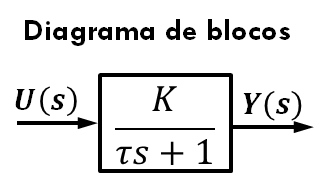
</div>



In [2]:
setenv PYTHON python3
pkg load symbolic
pkg load control
pkg load signal

### Função degrau

Aplique uma função `step` para os sistemas abaixo e verifique as consequências das constantes de tempo e amplificação em suas respostas.

\begin{equation}
G(s)=\frac{5}{2s+1}
\end{equation}
e
\begin{equation}
G(s)=\frac{5}{2s+2}
\end{equation}


Transfer function 'sys' from input 'u1' to output ...

         5   
 y1:  -------
      2 s + 1

Continuous-time model.


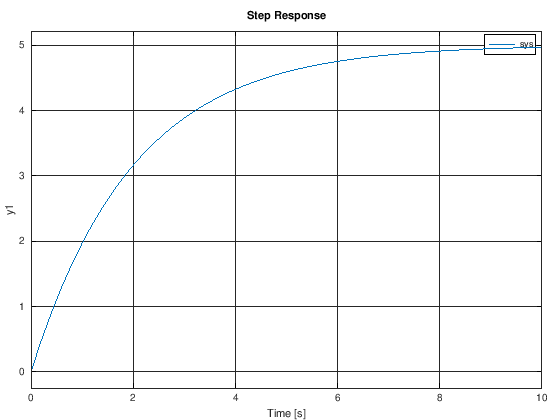

In [6]:
num=[5];
den=[2 1];
sys=tf(num,den)
step(sys,10);
grid on


Transfer function 'sys' from input 'u1' to output ...

         5   
 y1:  -------
      2 s + 2

Continuous-time model.


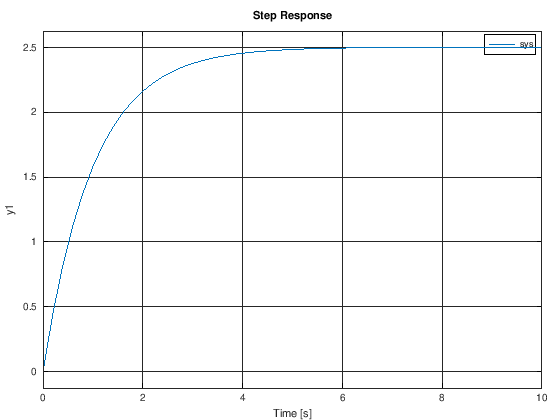

In [7]:
num=[5];
den=[2 2];
sys=tf(num,den)
step(sys,10);
grid on

Qual dos sistemas é mais lento?

\begin{equation}
G(s)=\frac{1}{2s+1}
\end{equation}
ou
\begin{equation}
G(s)=\frac{1}{5s+1}
\end{equation}


Transfer function 'sys1' from input 'u1' to output ...

         1   
 y1:  -------
      2 s + 1

Continuous-time model.

Transfer function 'sys2' from input 'u1' to output ...

         1   
 y1:  -------
      5 s + 1

Continuous-time model.


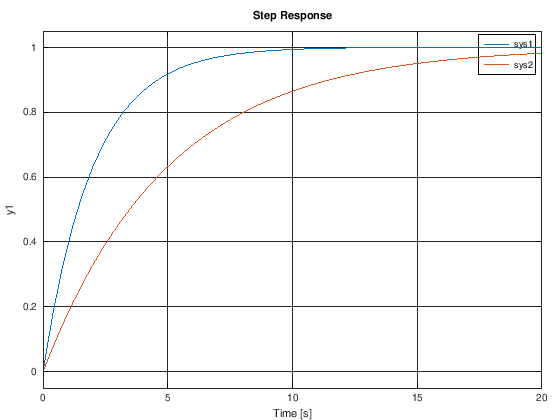

In [34]:
num=[1];
den=[2 1];
sys1=tf(num,den)
num=[1];
den=[5 1];
sys2=tf(num,den)
step(sys1,sys2,20);
grid on

#### Propriedades importantes do sistema obtidas através da função degrau

Algumas propriedades importantes do sistema são,

Tempo de subida $t_r$, *rise time* - é o tempo para que o sinal vá de $0.1$ a $0.9$ do seu valor final, ié, $t_r  \approx  2.2\tau$.	
Tempo de estabilização  $t_s$,*settling time* - é o tempo para que a resposta  alcance uma faixa de valores de $2\%$ em torno do valor final, ié, $t_s \approx 4\tau$.

O Octave não calcula esses valores, mas uma função famosa (listada abaixo) está disponível para ser usada. Verifique que, ao início, você deve configurar os seguintes parãmetros:

`RT = [0.1, 0.9];`

`ST = 0.02;`

que se referem ao início e final do tempo de subida (`RT`) e a porcentagem em torno do valor final para tempo de regime (`ST`).

In [28]:
% 
% Stepinfo
% by Aidan Macdonald (address@hidden)
% 
% Written to match specification found on
% www.mathwords.com/help/control/ref/stepinfo.html
% 
% 


function S = stepinfo(sys);

[y, t] = step (sys);
RT = [0.1, 0.9];
ST = 0.02;
   
% Find max points
[ypeak, i] = max (y);
tpeak = t(i);

[h, w] = size (y);

% Divide the signal into initial and final segments
% divided on the max point
yhead = y(1:i); % Everything before the peak
ytail = y(i:h); % Everything after peak
ttail = t(i:h);

[hf, wf] = size (ytail);

% Estimate the final convergent value
% Get average of second half of ytail
yfinal = mean (ytail(max (floor (hf/2), 1):hf));

% Estimate Rise time
% Capture indeces and errors of when
% the yhead reaches RT of yfinal
[err_low,  ilow]  = min (abs (yhead - yfinal*RT(1)));
[err_high, ihigh] = min (abs (yhead - yfinal*RT(2)));

% Get slope of line through the signal values
slope = (t(ihigh) - t(ilow))/(y(ihigh) - y(ilow));
% Errors used with linear approx to attempt to remove
% errors from the time measures
tlow = t(ilow) + slope*err_low;
thigh = t(ihigh) + slope*err_high;

rise_time = thigh - tlow;
% End of Rise Time Calculations

% Calculate settling params
settling_max = max (ytail);
settling_min = min (y(ihigh:h));

% Overshoot defined as percentage shot over the final
overshoot = (ypeak - yfinal)/yfinal;
undershoot = (yfinal - min(ytail))/yfinal;
% End Overshoot Calc

% Calculate Settling Time
% Take average over 100 samples
settling_ind = h - find(abs(fliplr(y) - yfinal) >= abs(ST*yfinal), 1);
settling_time = t(settling_ind);

S = struct('RiseTime', rise_time,
	   'SettlingTime', settling_time,
	   'SettlingMin', settling_min,
	   'SettlingMax', settling_max,
	   'Overshoot', overshoot,
	   'Undershoot', undershoot,
	   'Peak', abs(ypeak),
	   'PeakTime', tpeak);
endfunction


Transfer function 'sys' from input 'u1' to output ...

         1   
 y1:  -------
      2 s + 1

Continuous-time model.
S =

  scalar structure containing the fields:

    RiseTime =  4.2030
    SettlingTime =  9.8000
    SettlingMin =  0.88920
    SettlingMax =  0.99326
    Overshoot = 0
    Undershoot = 0
    Peak =  0.99326
    PeakTime =  10



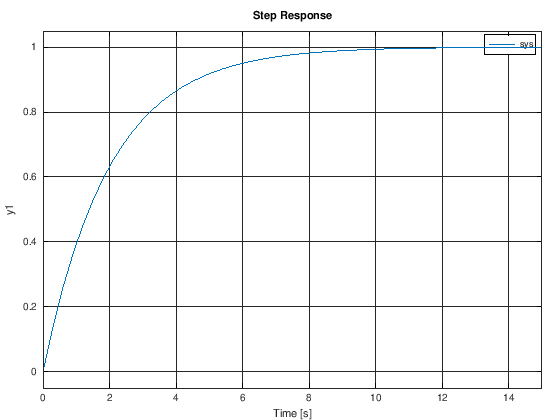

In [29]:
num=[1];
den=[2 1];
sys=tf(num,den)
step(sys,15);
grid on
S = stepinfo(sys)

#### Sistemas com zero

O sistema abaixo possui um zero (-2). Como esse zero afeta a resposta de um sistema de priemira ordem?

\begin{equation}
G(s)=\frac{s+2}{s+5}
\end{equation}

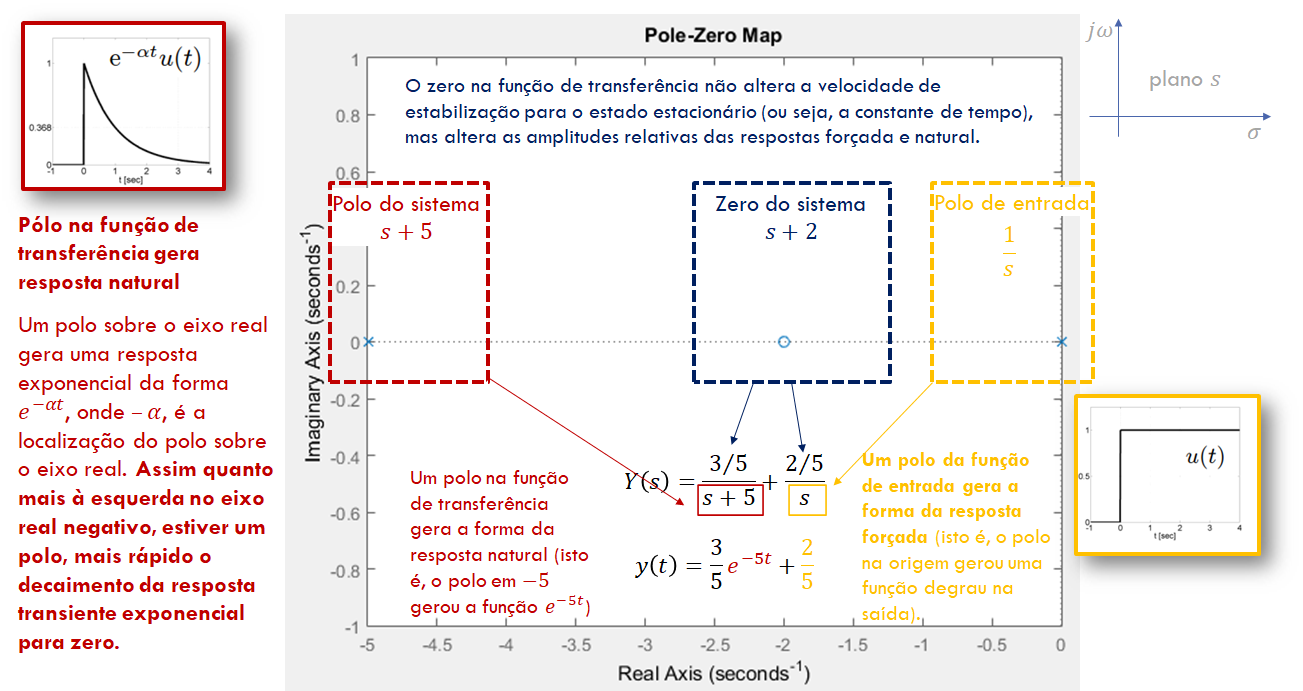


Transfer function 'sys' from input 'u1' to output ...

      s + 2
 y1:  -----
      s + 5

Continuous-time model.
z = -2
p = -5
k =  1


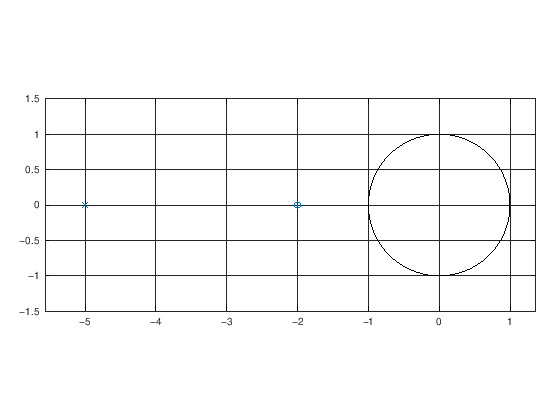

In [40]:
 num=[1 2];
 den=[1 5];
 sys=tf(num,den)
 [z,p,k]=tf2zp(sys)
 zplane(num,den)

Para mostrar as propriedades dos polos e zero, vamos analisar a resposta do sistema a um degrau unitário.

In [42]:
syms s
sys1=partfrac((s+2)/(s^2 +5*s));
pretty(sys1)

      3        2 
  --------- + ---
  5*(s + 5)   5*s


In [43]:
%ou
b=[1 2]; a=[1 5 0];
[r,p,k] = residue(b,a)

r =

   0.40000
   0.60000

p =

   0
  -5

k = [](0x0)


### Funções impulso e rampa

Use as funções `impulse` e  `ramp` para analisar o sistema,
\begin{equation}
G(s)=\frac{1}{2s+1}
\end{equation}



Transfer function 'sys' from input 'u1' to output ...

         1   
 y1:  -------
      2 s + 1

Continuous-time model.


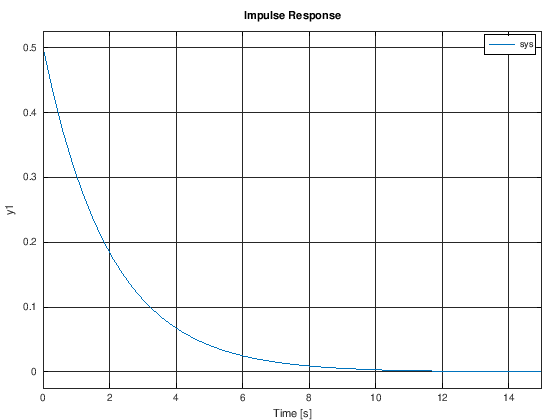

In [33]:
num=[1];
den=[2 1];
sys=tf(num,den)
impulse(sys,15);


Transfer function 'sys' from input 'u1' to output ...

         1   
 y1:  -------
      2 s + 1

Continuous-time model.


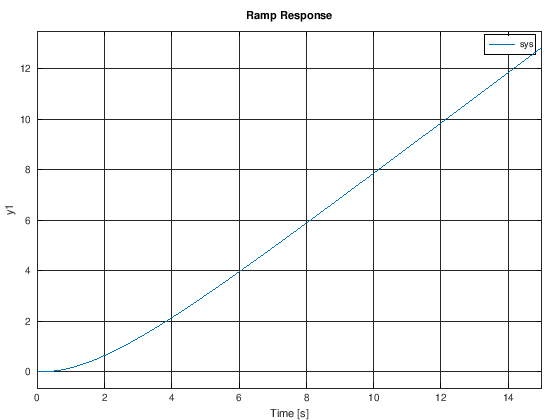

In [32]:
num=[1];
den=[2 1];
sys=tf(num,den)
ramp(sys,15);

### Onda senoidal

A resposta de um sistema de primeira ordem a uma entrada senoidal $𝐴 \sin{\omega t}$ é a seguinte,

\begin{equation}
y(t)=\frac{KA\omega \tau}{1+\left(\omega\tau\right)^2} e^{t/\tau} + \frac{KA}{\sqrt{1+\left(\omega\tau\right)^2}} \sin{\left(\omega t +\phi(\omega)\right)}
\end{equation}

onde 
$\phi(\omega)=-\tan^{-1}{\omega t}$ é o atraso da resposta em relação à entrada.

Observe que quando $t \to \infty$, tem-se a solução estacionária,
\begin{equation}
y_{est}(t)= \frac{KA}{\sqrt{1+\left(\omega\tau\right)^2}} \sin{\left(\omega t +\phi(\omega)\right)}
\end{equation}

Mostre graficamente a resposta de um sistema de primeira ordem a uma entrada senoidal.

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.1.
y = (sym)

                                                                                
  0.0012661940648257995249571764816494*sin(31.4159265358979*t)*Heaviside(t) - 0.
  
                                                                                
  079557319441514601108161828586956*cos(31.4159265358979*t)*Heaviside(t) + 0.079
  
                                  -0.5*t             
  557319441514606408674291259059*e      *Heaviside(t)



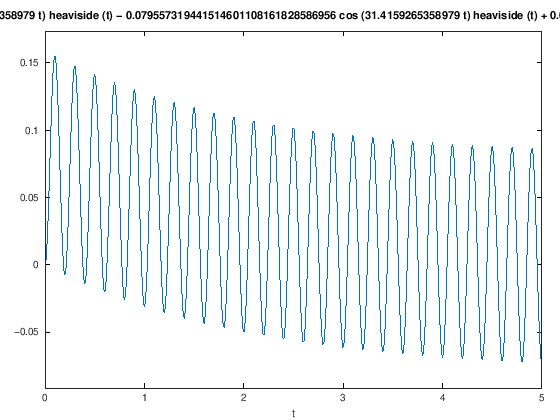

In [60]:
%Laplace de sin(wt)=w/(s^2+w^2)
%Asin(wt)+Bcos(wt)=Csin(wt-phi), onde: C=sqrt(A^2+B^2),phi=atan(-B/A)
clear all;close all
syms s t 
w=10*pi; 
tau= 2.;
K= 1.;
A=5.;
%omega=10;
Y=vpa(A)*vpa(K)*vpa(w)/(vpa(tau)*s^3+s^2+vpa(tau)*vpa(w)^2*s+vpa(w)^2);
y=ilaplace(Y,s,t)
ezplot(y,[0,5])


## Estudos de Caso

Considere a função de transferência

\begin{equation}
G(s)=\frac{100}{s+20}
\end{equation}

Calcule,
* O valor do polo;
* A constante de tempo;
* O valor final da saída através do Teorema do Valor Final
* O valor final da saída através da resposta no tempo $𝑦(𝑡)$
* O valor da saída para uma constante de tempo $(𝑡=\tau)$.

Obs. Este exercício está respondido nas notas de aula.

In [ ]:
#Sua resposta

Um termômetro de mercúrio com constante de tempo de $0.1$min e amplificação $1$ é colocado em uma temperatura $T=100^o C$ até atingir o equilíbrio com o líquido. No instante $𝑡=0$, a temperatura do líquido começa a variar de forma  senoidal, em torno de $100^oC$, com amplitude de $2^oC$. Se a frequência de oscilação é $10∕\pi$ e $100/\pi$ ciclos/min, plote a resposta do termômetro com o tempo.

* Qual a máxima temperatura medida pelo termômetro em cada frequência?
* Qual o atraso da resposta em cada frequência? 
* Sabe-se que a razão entre as amplitudes da resposta (solução estacionária) e da entrada é a chamada razão de amplitude, $𝑀_𝑃 (\omega)$, e representa o efeito da dinâmica do processo, $\tau$, sobre a resposta senoidal. Dessa forma, explique a diferença entre as saídas para as diferentes frequências.

\begin{equation}
M_P(\omega)=\frac{1}{\sqrt{1+\left(\omega\tau\right)^2}}
\end{equation}

* Um sistema de primeira ordem pode ser usado como filtro? Que tipo de filtro? Justifique.

In [ ]:
#Sua resposta

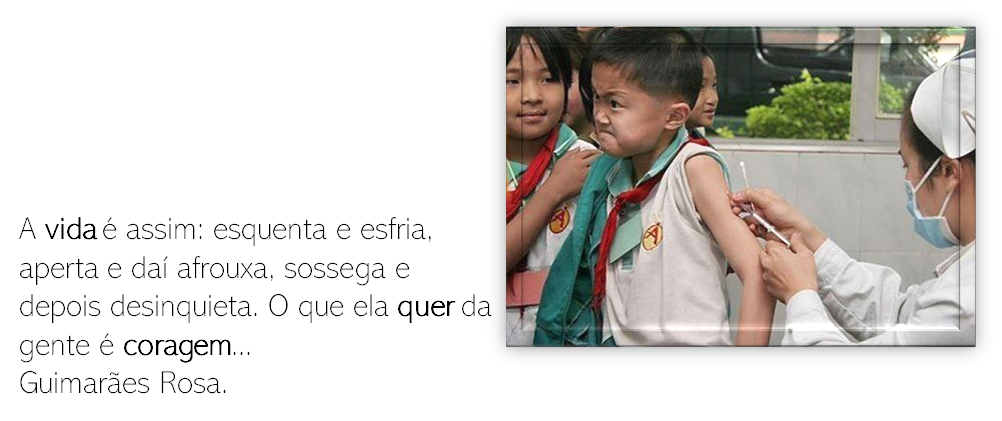